# Summit AWAKEN Layout

In [1]:
# Load the amrwind-frontend module
amrwindfedir = '/ascldap/users/lcheung/wind_uq/amrwind-frontend/'  # Location of amrwind-frontend 

import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

In [2]:
# Add this to load local packages
import sys
sys.path.insert(1, '/ascldap/users/lcheung/.local/lib/python2.7/site-packages')
import utm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data from the database of all turbines
df = pd.read_csv('/projects/AWAKEN/lcheung/awaken.github/ThunderRanchCoords/uswtdb_v3_3_20210114.csv',low_memory=False)

In [4]:
turbines=[]
addKingPlains     = True
addArmadilloFlats = True
addThunderRanch   = True
addBreckinridge   = True
addChisholmView   = True

In [5]:
precursorinputfile = 'UnstableABL_precursor1.inp'
summitcsv          = 'UnstableABL_precursor1_turbines.csv'

### King Plains turbines

In [6]:
KPturbs1=df[df['p_name']=="unknown Noble County"]
KPturbs2=df[df['p_name']=="unknown Garfield County"]

KPcount = 0

if addKingPlains:
    ge2p8='GE2.8-127'
    turblist = []
    # Turbines from Noble County
    for index, row in KPturbs1.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        turbines.append(datarow)
        KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    # Turbines from Garfield County
    for index, row in KPturbs2.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        if utmxy[1]>4020000:  # Remove the ones from Armadillo Ranch
            turbines.append(datarow)    
            KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        
    print("King Plains: %i turbines"%(KPcount))
    print('Turbine types: '+repr(turblist))

King Plains: 88 turbines
Turbine types: ['GE2.8-127']


### Armadillo flats turbines

In [7]:
AFturbs=df[df['p_name']=="Armadillo Flats"]

In [8]:
if addArmadilloFlats:
    turblist = []
    # Turbines from Armadillo Flats
    for index, row in AFturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','AF').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    print("Armadillo Flats: %i turbines"%(len(AFturbs)))
    print('Turbine types: '+repr(turblist))

Armadillo Flats: 109 turbines
Turbine types: ['GE1.79-100', 'GE1.715-103', 'GE2.3-116']


## Thunder Ranch turbines

In [9]:
TRturbs=df[df['p_name']=="Thunder Ranch"]

In [10]:
if addThunderRanch:
    turblist = []
    for index, row in TRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','TR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Thunder Ranch: %i turbines"%(len(TRturbs)))
    print('Turbine types: '+repr(turblist))

Thunder Ranch: 120 turbines
Turbine types: ['GE2.5-116', 'GE2.3-116']


## Breckenridge turbines

In [11]:
BRturbs=df[df['p_name']=="Breckinridge"]

In [12]:
if addBreckinridge:
    turblist = []
    for index, row in BRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','BR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Breckinridge: %i turbines"%(len(BRturbs)))
    print('Turbine types: '+repr(turblist))

Breckinridge: 57 turbines
Turbine types: ['GE1.7-103']


## Add Chisholm View

In [13]:
CV1turbs=df[df['p_name']=="Chisholm View"]
CV2turbs=df[df['p_name']=="Chisholm View II"]

In [14]:
CVcount = 0

if addChisholmView:
    turblist = []
    for index, row in CV1turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    for index, row in CV2turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    print("Chisholm View: %i turbines"%(CVcount))
    print('Turbine types: '+repr(turblist))

Chisholm View: 167 turbines
Turbine types: ['GE1.68-82.5', 'GE2.4-107']


In [15]:
print("Total turbines: %i"%(len(turbines)))

Total turbines: 541


### Write the CSV file

In [16]:
verbose=False

# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
header="""# name, x, y, type, yaw, hubheight, options"""
with open(summitcsv, 'w') as f:
    f.write(header+'\n')
    if verbose: print(header)
    for x in turbines: 
        #line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['lat'], x['long'], 'Summit_'+x['t_model'])
        line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['utm'][0], x['utm'][1], 'Summit_'+x['t_model'])
        f.write(line+'\n')
        if verbose: print(line)

## AWAKEN Wind farm layout for Summit

**Note**: to make sure that the correct turbines are in place for setting up this layout file, make sure something like this file is in place:

In [17]:
with open(amrwindfedir+"turbines/summitlayoutturbs.yaml")as f: print(f.read())

turbines:
  Summit_GE1.68-82.5:
    turbinetype_name:    "Summit_GE1.68-82.5"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      82.5
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.715-103:
    turbinetype_name:    "Summit_GE1.715-103"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      103
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.715-103:
    turbinetype_name:    "Summit_GE1.715-103"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      103
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.79-100:
    turbinetype_name:    "Summit_GE1.79-100"
    turbinetype_comment

In [18]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

In [19]:
WS     = 10            # Wind speed, m/s
WDir   = 175           # Wind direction, degrees
farm_domainsize = [102400, 102400, 2560]
farm_center     = [640000, 4030000]   # In utm
#print(utm.from_latlon(36.587395, -97.756294))
#farm_center          = utm.to_latlon(640000, 4030000, 14, 'S')
print("Farm center = "+repr(farm_center)) # in lat/long
farm_background_mesh = 20

Farm center = [640000, 4030000]


In [20]:
case.setAMRWindInput('useWSDir', True)
case.setAMRWindInput('ABL_windspeed', WS, forcechange=True)
case.setAMRWindInput('ABL_winddir',   WDir, forcechange=True)
case.ABL_calculateWindVector()

In [21]:
# Some random stuff
case.setAMRWindInput('incflo.physics', ['FreeStream', 'Actuator'])
case.setAMRWindInput('time.fixed_dt', 0.1)

In [22]:
# Set some tolerances (leave this alone)
tols = """
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol                       = 1e-12               
mac_proj.mg_rtol                         = 1e-06               
mac_proj.mg_atol                         = 1e-12               
diffusion.mg_rtol                        = 1e-06               
diffusion.mg_atol                        = 1e-12               
temperature_diffusion.mg_rtol            = 1e-10               
temperature_diffusion.mg_atol            = 1e-13               
"""
case.loadAMRWindInput(tols, string=True);

In [23]:
case.loadTurbineCSVFile(summitcsv)

In [24]:
case.setAMRWindInput('turbines_coordsys', 'utm')

# Set up the domain 
case.setAMRWindInput('turbines_domainsize',         farm_domainsize)
case.setAMRWindInput('turbines_backgroundmeshsize', farm_background_mesh)
case.setAMRWindInput('turbines_autocalccenter',     False)
case.setAMRWindInput('turbines_farmcenter',         [farm_center[0], farm_center[1]])
case.setAMRWindInput('turbines_deleteprev', True)

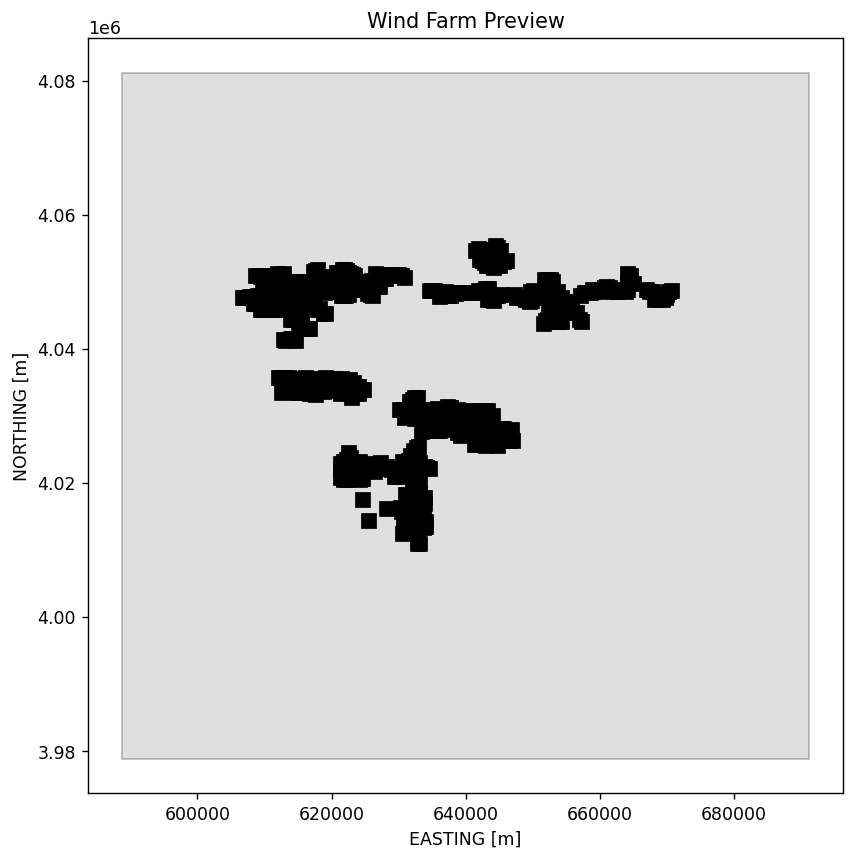

In [25]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=125)
case.setAMRWindInput('turbines_plotnames', False)
case.turbines_previewAllTurbines(ax=ax)

In [26]:
case.getAMRWindInput('turbines_farmcenter')

[640000.0, 4030000.0]

In [27]:
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
print(len(case.listboxpopupwindict['listboxactuator'].getitemlist()))

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()
541


## Add refinements

In [28]:
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
0,     30000,    30000,      40000,  100,  1000,      center:farm units:meter
#1,     20000,    25000,      30000,  100,  500,   center:farm units:meter
1,  10000,    7500,    21000,  100,  250, center:specified units:meter centerx:653000 centery:4050000 centerz:100 name:TR
1,   7500,    6500,    12500,  100,  250, center:specified units:meter centerx:640000 centery:4030000 centerz:100 name:KP
1,  11000,    9000,    12500,  100,  250, center:specified units:meter centerx:630000 centery:4018000 centerz:100 name:AF
1,   4000,    3000,     9000,  100,  250, center:specified units:meter centerx:618000 centery:4035000 centerz:100 name:BR
1,  10000,    5000,    14000,  100,  250, center:specified units:meter centerx:618000 centery:4050000 centerz:100 name:CV
#2,     0.5,  0.5, 0.5, 0.525, 0.525,
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [29]:
case.refine_createAllZones()

Plotting turbines


(583680.0, 696320.0, 3973680.0, 4086320.0)

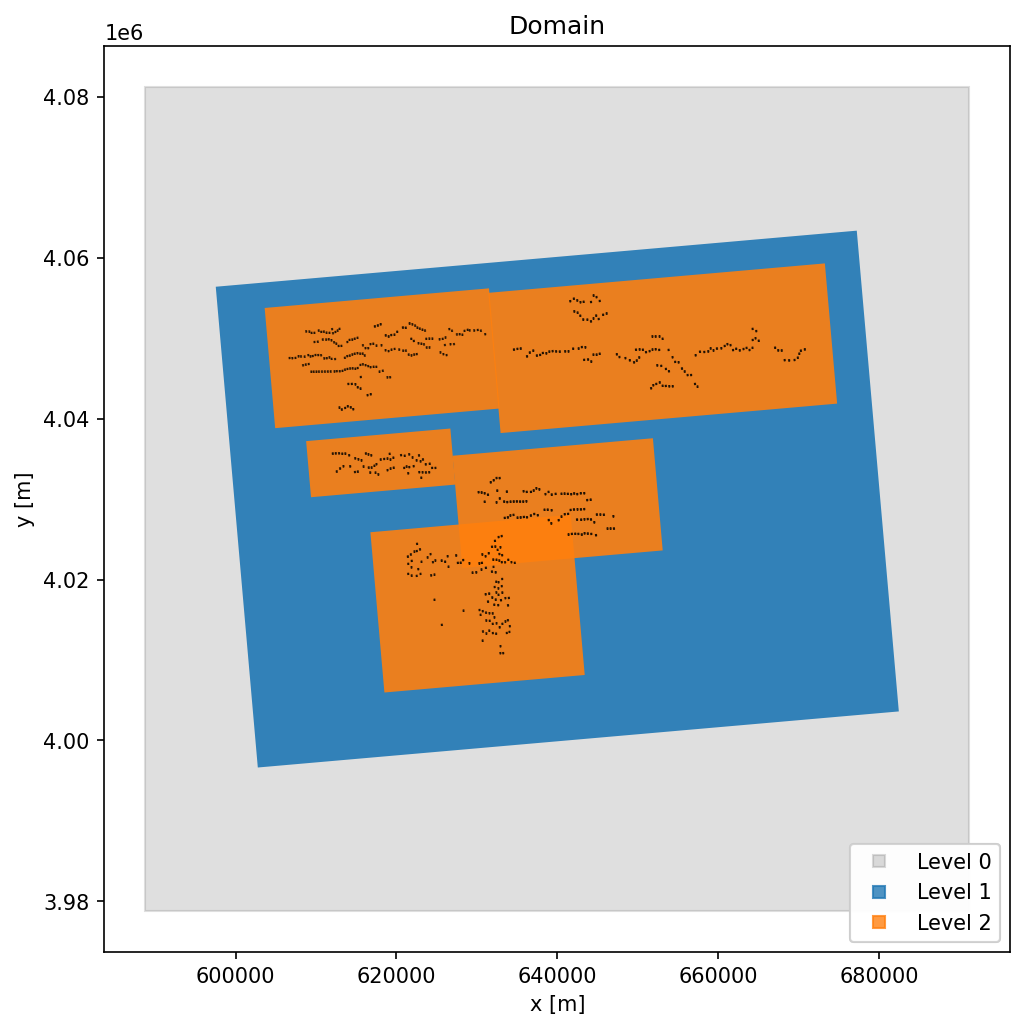

In [30]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.plotDomain(ax=ax)
ax.axis('scaled')

Plotting turbines


(583680.0, 696320.0, -934.6519606373, 2726.411998125586)

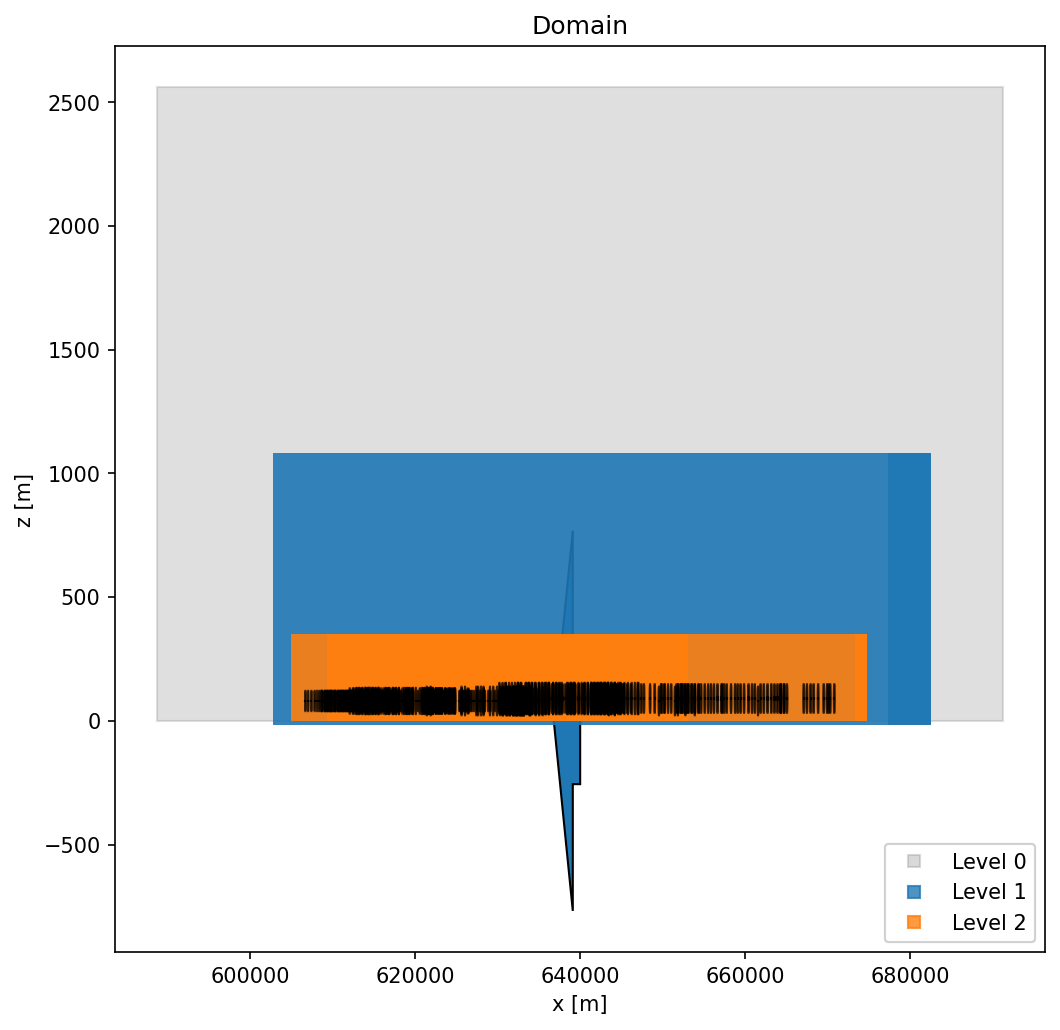

In [31]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = True
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ'
case.plotDomain(ax=ax)
ax.axis('auto')

In [32]:
case.listboxpopupwindict['listboxactuator'].deleteall()
print(case.listboxpopupwindict['listboxactuator'].getitemlist())

[]


In [33]:
# Estimate mesh size
case.estimateMeshSize(verbose=False)

ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0   3355443200             20.0 x 20.0 x 20.0
       1   5280000000             10.0 x 10.0 x 10.0
       2   5966800000                5.0 x 5.0 x 5.0
  TOTAL:  14602243200


Text(0.5, 1.0, 'Simulated AWAKEN Domain')

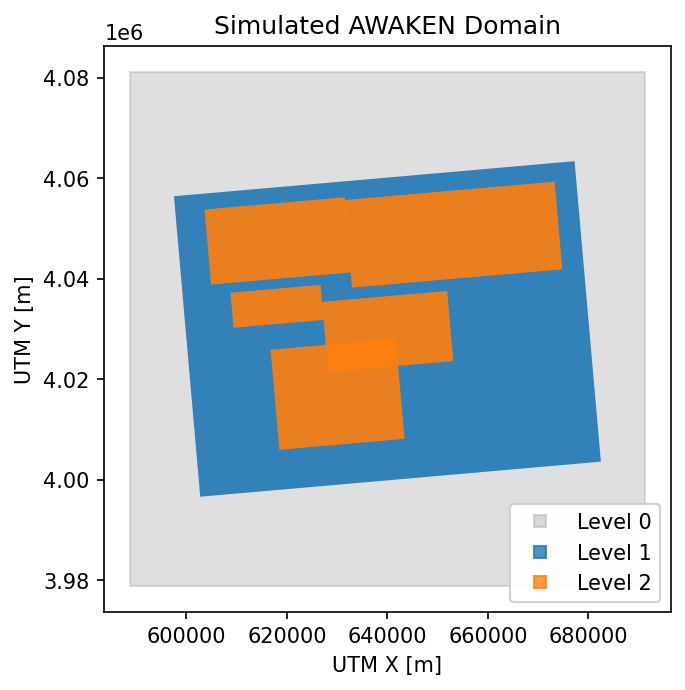

In [34]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(5,5), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.plotDomain(ax=ax)
ax.axis('scaled')
plt.xlabel('UTM X [m]')
plt.ylabel('UTM Y [m]')
plt.title('Simulated AWAKEN Domain')

In [35]:
# Set the time constants
case.setAMRWindInput('time.stop_time', 20000.0)
case.setAMRWindInput('time.max_step',  80000)

case.setAMRWindInput('time.fixed_dt',  0.25)
case.setAMRWindInput('time.checkpoint_interval',  2000)

In [36]:
 # Set some basic parameters
case.setAMRWindInput('incflo.physics',      ['ABL'])  # Must have ABL physics to do ABL calculations
case.setAMRWindInput('incflo.verbose',      3)        # This is optional, verbose=3 means more info in the output logs
case.setAMRWindInput('io.check_file',       'chk')    # What to name the checkpoint files

case.setAMRWindInput('incflo.use_godunov',  True)       # Always use a godunov scheme
case.setAMRWindInput('incflo.godunov_type', 'weno_z')   # Use 'weno_z' 

case.setAMRWindInput('turbulence.model',    ['OneEqKsgsM84'])    # One equation k-sgs subgrid scale model
case.setAMRWindInput('TKE.source_terms',    ['KsgsM84Src'])      # The corresponding source term

case.setAMRWindInput('transport.viscosity', 1.853e-05)           # viscosity
case.setAMRWindInput('incflo.density',      1.17)                # density

In [37]:
# Set the wind speed and direction
case.setAMRWindInput('useWSDir', True)                           # Allows you to specify wind speed + wind direction 
case.setAMRWindInput('ABL_windspeed', 9.0, forcechange=True)     # Wind speed of 9 m/s
case.setAMRWindInput('ABL_winddir',   175, forcechange=True)     # Wind direction of 175 degrees
case.ABL_calculateWindVector()

In [38]:
# This cell sets up boundary conditions
case.setAMRWindInput('is_periodicx', True)     # periodic in x
case.setAMRWindInput('is_periodicy', True)     # periodic in y
case.setAMRWindInput('is_periodicz', False)    # Enforce some boundary conditions in z

# Boundary conditions in z
case.setAMRWindInput('zlo.type',              'wall_model')          
case.setAMRWindInput('zlo.temperature_type',  'wall_model')          
case.setAMRWindInput('zlo.tke_type',          'zero_gradient')       
case.setAMRWindInput('zhi.type',              'slip_wall')           
case.setAMRWindInput('zhi.temperature_type',  'fixed_gradient')      
case.setAMRWindInput('zhi.temperature',       0.003) 

In [39]:
# Now set up ABL specific forces, parameters, etc.
case.setAMRWindInput('ICNS.source_terms',     ['ABLForcing','BoussinesqBuoyancy', 'CoriolisForcing'])

case.setAMRWindInput('ABL.stats_output_frequency',   1)           # Output ABL stats every iteration            
case.setAMRWindInput('ABL.stats_output_format',   'netcdf')       # Use netcdf output because that's how we postprocess

#case.setAMRWindInput('incflo.velocity',     [8.69, 0.0, 0.0])    # Already taken care of
case.setAMRWindInput('ABLForcing.abl_forcing_height',   91)       # Hub height wind speed you want specify 
case.setAMRWindInput('ABL.kappa',                       0.4)      # Kolmogorov constant

case.setAMRWindInput('ABL.normal_direction',      2)              # vertical is in z
case.setAMRWindInput('ABL.surface_roughness_z0',  0.15)           # Surface roughess, SOMETHING WE WILL PROBABLY WANT TO ITERATE ON
case.setAMRWindInput('ABL.reference_temperature', 303.803)        # Correspond to what was measured at ARM
case.setAMRWindInput('ABL.surface_temp_rate',     0.0)            # d(Temperature)/dt ---> set this to zero for unstable ABL
case.setAMRWindInput('ABL.surface_temp_flux',     0.050)          # Surface temperature flux (K*m/s) --> Use this for unstable ABL's (ITERATE ON THIS TOO)

# Monin-Obukhov parameters (No need to change)
case.setAMRWindInput('ABL.mo_beta_m',             16.0)
case.setAMRWindInput('ABL.mo_gamma_m',            5.0)
case.setAMRWindInput('ABL.mo_gamma_h',            5.0)
case.setAMRWindInput('ABL.random_gauss_mean',     0.0)
case.setAMRWindInput('ABL.random_gauss_var',      1.0)

CANNOT update: ABLMeanBoussinesq use forcechange=True in setval()


In [40]:
case.setAMRWindInput('CoriolisForcing.latitude',  36.57236455833334 )        # Sets up the latitude of the site
case.setAMRWindInput('BoussinesqBuoyancy.reference_temperature', 303.803)    # The reference temperature

# These inputs set up the initial temperature profile (Same as Nalu-Wind temperature profile)
case.setAMRWindInput('ABL.temperature_heights', '0       1400.0  1500.0  2500.0')
case.setAMRWindInput('ABL.temperature_values',  '305.803 305.803 313.803 314.553')

In [41]:
# This is a case where we don't want to use the defaults in amrwind-frontend
case.setAMRWindInput('ABL.perturb_ref_height', 50.0)
case.setAMRWindInput('ABL.Uperiods', 4.0)
case.setAMRWindInput('ABL.Vperiods', 4.0)
case.setAMRWindInput('ABL.deltaU',   1.0)
case.setAMRWindInput('ABL.deltaV',   1.0)
case.setAMRWindInput('ABL.theta_amplitude',   None)
case.setAMRWindInput('ABL.cutoff_height',   None)
case.setAMRWindInput('ABL.perturb_velocity', True)
case.setAMRWindInput('ABL.perturb_temperature', False)

In [42]:
case.extradictparams['amr.blocking_factor'] = 32 
case.extradictparams['amr.max_grid_size']   = 64 

In [43]:
# Check that all inputs are okay
check=case.validate()

-- Checking inputs --
[ PASS] max_level:           max_level = 2 >= 0
[ PASS] dt & CFL:            DT and CFL OK
[ PASS] Actuator physics:    incflo.physics and ICNS.source_terms OK for Actuators
[ SKIP] Actuator FST:        No Actuators
[ SKIP] Sampling probes:     Not active or no sampling planes

Results: 
 3 PASS
 2 SKIP
 0 FAIL
 0 WARN


In [44]:
# Write the input file
print(case.writeAMRWindInput(precursorinputfile))

# --- Simulation time control parameters ---
time.stop_time                           = 20000.0             # Max (simulated) time to evolve [s]
time.max_step                            = 80000               
time.fixed_dt                            = 0.25                # Fixed timestep size (in seconds). If negative, then time.cfl is used
time.checkpoint_interval                 = 2000                
incflo.physics                           = ABL                 # List of physics models to include in simulation.
incflo.verbose                           = 3                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
turbulence.model                         = OneEqKsgsM84        
TKE.source_terms                         = KsgsM84Src          
nodal_proj.mg_rtol                       = 1e-06               
nodal_proj.mg_atol             